In [19]:
# Description : Working of Stock Analyzing indicator Ease of Movement (EMV) and plot it on plotly.

In [7]:
# Import Python Libraries
import pandas as pd
import numpy as np
import pandas_datareader as web
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

import plotly.graph_objects as go

In [8]:
# Get the Stock Symbol for the Portfolio 
stockSymbols = ['SBIN.NS']

# GET the stock starting date
stockDate = '2019-01-01'

# Get the stock ending date.
stock_End_date = '2020-06-30'

In [9]:
# Create a function to get the stock prices in the portfolio
def getMyPortfolio(stocks = stockSymbols, start = stockDate, end=stock_End_date):
  data = web.DataReader(stocks, data_source='yahoo', start=start, end=end, )
  data.columns = ['AdjClose', 'Close', 'High', 'Low', 'Open', 'Volume']
  return data

In [10]:
# Get the stock portfolio Adj. Close price
my_stocks = getMyPortfolio(stockSymbols)
my_stocks

,AdjClose,Close,High,Low,Open,Volume
Date,,,,,,
2019-01-01,299.600006,299.600006,300.700012,293.850006,297.500000,11837127.0
2019-01-02,293.899994,293.899994,302.500000,293.100006,299.100006,25559853.0
2019-01-03,291.100006,291.100006,295.549988,290.100006,295.000000,17548347.0
2019-01-04,297.649994,297.649994,299.000000,291.500000,292.100006,19514041.0
2019-01-07,296.299988,296.299988,301.500000,295.200012,301.049988,14579399.0
...,...,...,...,...,...,...
2020-06-25,185.250000,185.250000,186.800003,180.399994,182.199997,73620385.0
2020-06-26,184.600006,184.600006,188.600006,183.800003,188.000000,49176958.0
2020-06-29,179.250000,179.250000,183.100006,178.500000,183.000000,50966428.0


# Ease of Movement (EMV):

## Ease of Movement is calculated in two step.
### 1. Distance moved
### 2. Box ratio

## The Mathematical Form of EMV is as follow:

### $$EVM=\frac{Distance.moved}{Box.ratio}$$

## Distance moved :
#### $$ Distancemoved = \frac{(Current High + Current Low)}{2}-\frac{(Prior High + Prior Low)}{2}$$

In [17]:
Distance_moved = ((my_stocks['High'] + my_stocks['Low'])/2) - ((my_stocks['High'].shift(1) + my_stocks['Low'].shift(1))/2)

my_stocks['Dist_moved'] = Distance_moved
my_stocks['Dist_moved']

Date
2019-01-01         NaN
2019-01-02    0.524994
2019-01-03   -4.975006
2019-01-04    2.425003
2019-01-07    3.100006
                ...   
2020-06-25   -5.799995
2020-06-26    2.600006
2020-06-29   -5.400002
2020-06-30   -0.725006
2020-07-01    1.925003
Name: Dist_moved, Length: 365, dtype: float64

## Box Ratio:

## $Box ratio = \frac{(Volume / 100,000,000)}{(Current High – Current Low)}$

In [18]:
Box_ratio = (my_stocks['Volume'] / 100000000) / ((my_stocks['High'] - my_stocks['Low']))

my_stocks['box_ratio'] = Box_ratio
my_stocks['box_ratio']

Date
2019-01-01    0.017280
2019-01-02    0.027191
2019-01-03    0.032199
2019-01-04    0.026019
2019-01-07    0.023142
                ...   
2020-06-25    0.115032
2020-06-26    0.102452
2020-06-29    0.110796
2020-06-30    0.077192
2020-07-01    0.079431
Name: box_ratio, Length: 365, dtype: float64

## Ease of Movement:

In [21]:
my_stocks['EMV'] = my_stocks['Dist_moved'] / my_stocks['box_ratio']

In [22]:
# declare a figure
fig=go.Figure()

fig.add_trace(go.Scatter(x=my_stocks.index, y= my_stocks['EMV'], line=dict(width=1.5, color = 'red'), name = 'CCL'))

fig.add_trace(go.Candlestick(x=my_stocks.index, open=my_stocks['Open'], high=my_stocks['High'], low=my_stocks['Low'], close=my_stocks['Close'], name = 'Market Data'))

fig.show()


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

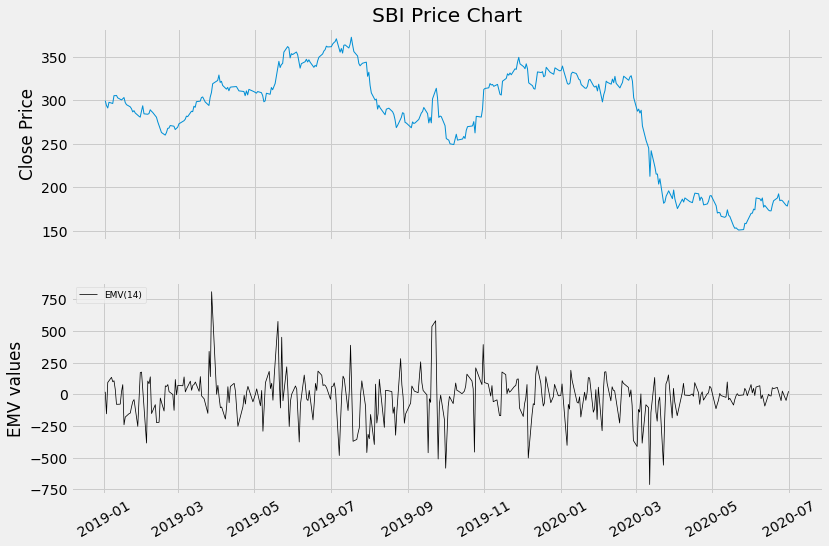

In [25]:
# Plotting the Price Series chart and the Ease Of Movement below
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(2, 1, 1)
ax.set_xticklabels([])
plt.plot(my_stocks['Close'],lw=1)
plt.title('SBI Price Chart')
plt.ylabel('Close Price')
plt.grid(True)
bx = fig.add_subplot(2, 1, 2)
plt.plot(my_stocks['EMV'],'k',lw=0.75,linestyle='-',label='EMV(14)')
plt.legend(loc=2,prop={'size':9})
plt.ylabel('EMV values')
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)

In [33]:
! [alt text here](https://github.com/abkedar/Stock-Market-Algorithm/blob/main/images/Working_of_Stock_Analyzing_indicator_Ease_of%20Movement_(EMV).png "Plotly graph of Ease of Movement")

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: ` [alt text here](https://github.com/abkedar/Stock-Market-Algorithm/blob/main/images/Working_of_Stock_Analyzing_indicator_Ease_of%20Movement_(EMV).png "Plotly graph of Ease of Movement")'
